# Session-1: An introduction to Pandas

------------------------------------------------------
*Introduction to Data Science & Machine Learning*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

When dealing with numeric matrices and vectors in Python, Numerical Python ([Numpy](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html NumPy)) makes life a lot easier. Doing data analysis directly with NumPy can be problematic, as many different data types have to jointly managed.

Fortunately, some nice folks have written the **[Python Data Analysis Library](https://pandas.pydata.org/)** (a.k.a. pandas). Pandas is an open sourcelibrary providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

In this tutorial, we'll go through the basics of pandas using a database of house prices provided by [Kaggle](https://www.kaggle.com/). Pandas has a lot of functionality, so we'll only be able to cover a small fraction of what you can do. Check out the (very readable) [pandas docs](http://pandas.pydata.org/pandas-docs/stable/) if you want to learn more.

### Acknowledgment:

I have compiled this tutorial by putting together a few very nice blogs and posts I found on the web. All credit goes to them:
- [An introduction to Pandas](http://synesthesiam.com/posts/an-introduction-to-pandas.html#handing-missing-values)
- [Using iloc, loc, & ix to select rows and columns in Pandas DataFrames](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)


## Getting Started

Let's import the libray and check the current installed version

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#The following is required to print the plots inside the notebooks
%matplotlib inline 

In [34]:
pd.__version__

'0.22.0'

If you are using Anaconda and you want to update pandas to the latest version, you can use either the [package manager](https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages) in Anaconda Navigator, or type in a terminal window
```
> conda update pandas
```


Next lets read the housing price database, which is provided by [Kaggle in this link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). Because it's in a CSV file, we can use pandas' `read_csv` function to pull it directly into the basic data structure in pandas: a **DataFrame**.

In [35]:
data = pd.read_csv("house_prices_train.csv")

We can visualize the first rows of the Dataframe `data`

In [36]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You have a description of all fields in the [data description file](./data_description.txt).


You can check the size of the Dataframe and get a list of the column labels as follows:

In [37]:
print("The dataframe has %d entries, and %d attributes (columns)\n" %(data.shape[0],data.shape[1]))

print("The labels associated to each of the %d attributes are:\n " %(data.shape[1]))
label_list = list(data.columns)

print(label_list)

The dataframe has 1460 entries, and 81 attributes (columns)

The labels associated to each of the 81 attributes are:
 
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'Ga

Columns can be accessed in two ways. The first is using the DataFrame like a dictionary with string keys:

In [38]:
data[['SalePrice']].head(10)   #This shows the first 10 entries in the column 'SalePrice'

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
5,143000
6,307000
7,200000
8,129900
9,118000


You can get multiple columns out at the same time by passing in a list of strings.

In [39]:
simple_data = data[['LotArea','1stFlrSF','2ndFlrSF','SalePrice']]   
#Subpart of the dataframe. 
# Watch out! This is not a different copy!

simple_data.tail(10) #.tail() shows the last 10 entries

,LotArea,1stFlrSF,2ndFlrSF,SalePrice
1450,9000,896,896,136000
1451,9262,1578,0,287090
1452,3675,1072,0,145000
1453,17217,1140,0,84500
1454,7500,1221,0,185000
1455,7917,953,694,175000
1456,13175,2073,0,210000
1457,9042,1188,1152,266500
1458,9717,1078,0,142125
1459,9937,1256,0,147500


## Operations with columns

We can easily [change the name](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) of the columns

In [40]:
data.rename(index=str,columns={"LotArea":"Area"}, inplace=True)

Try to rename the column name directly in `simple.data`, what do you get?


There are a lot of useful methods that can be applied over columns. Most of pandas' methods will happily ignore missing values like `NaN`. We will talk about **missing data** later.

First, since we rename one column name, lets recompute the short (referenced) data-frame `simple_data``


In [41]:
simple_data = data[['Area','1stFlrSF','2ndFlrSF','SalePrice']]   
print(simple_data.head(5))

print(simple_data['Area'].mean())
print(simple_data['Area'].std())

    Area  1stFlrSF  2ndFlrSF  SalePrice
0   8450       856       854     208500
1   9600      1262         0     181500
2  11250       920       866     223500
3   9550       961       756     140000
4  14260      1145      1053     250000
10516.828082191782
9981.264932379147


Some methods, like plot() and hist() produce plots using [matplotlib](https://matplotlib.org/). We'll go over plotting in more detail later.

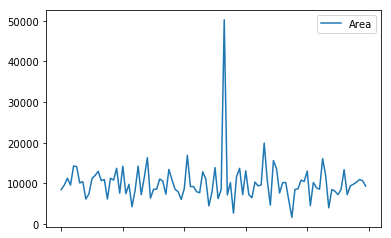

In [42]:
simple_data[['Area']][:100].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e674d30>]], dtype=object)

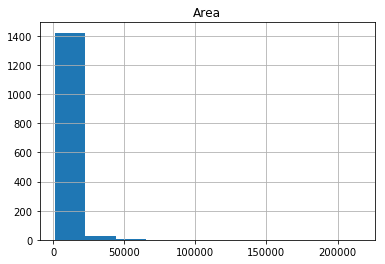

In [43]:
simple_data[['Area']].hist()

## Operations with `apply()`

Methods like `sum()` and `std()` work on entire columns. We can run our own functions across all values in a column (or row) using `apply()`.

To get an idea about how this works, assume we want to convert the variable ['Area'] into squared meters instead of square foots. First, we create a conversion function.

In [44]:
def sfoot_to_smeter(x):
    return (x * 0.092903)

In [45]:
sfoot_to_smeter(1) #just checking everything is correct

0.092903

Using the `apply()` method, which takes an [anonymous function](https://docs.python.org/2/reference/expressions.html#lambda), we can apply `sfoot_to_smeter` to each value in the column. We can now either overwrite the data in the column 'Area' or create a new one. We'll do the latter in this case.

In [46]:
# Recall! data['Area'] is not a DataFrama, but a Pandas Series (another data object with different attributes). In order
# to index a DataFrame with a single column, you should use double [[]], i.e., data[['Area']]

data['Area_m2'] = data[['Area']].apply(lambda d: sfoot_to_smeter(d))

In [47]:
simple_data = data[['Area','Area_m2', '1stFlrSF','2ndFlrSF','SalePrice']]     

simple_data.head()

,Area,Area_m2,1stFlrSF,2ndFlrSF,SalePrice
0,8450,785.03035,856,854,208500
1,9600,891.86880,1262,0,181500
2,11250,1045.15875,920,866,223500
3,9550,887.22365,961,756,140000
4,14260,1324.79678,1145,1053,250000


What do you get if you try to apply the transformation directly over `simple_data`? What do you think the problem is?

Now, we do not even need the column `Area`(in square foot), lets remove it.

In [48]:
data.drop('Area',axis=1,inplace=True)

data.head(5) 

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_m2
0,1,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,785.03035
1,2,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,891.86880
2,3,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1045.15875
3,4,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,887.22365
4,5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1324.79678


# Indexing, iloc, loc

There are [multiple ways](http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing) to select and index rows and columns from Pandas DataFrames. 

There’s three main options to achieve the selection and indexing activities in Pandas, which can be confusing. The three selection cases and methods covered in this post are:

- Selecting data by row numbers (.iloc)
- Selecting data by label or by a conditional statment (.loc)
- Selecting in a hybrid approach (.ix) (now Deprecated in Pandas 0.20.1)

We will cover the first two

### Selecting rows using `iloc()`

The [`iloc`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html) indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.

The iloc indexer syntax is `data.iloc[<row selection>, <column selection>]`. “iloc” in pandas is used to select rows and columns by number, **in the order that they appear in the data frame**. You can imagine that each row has a row number from 0 to the total rows (data.shape[0])  and iloc[] allows selections based on these numbers. The same applies for columns (ranging from 0 to data.shape[1] )

In [49]:
simple_data.iloc[[3,4],0:3]

,Area,Area_m2,1stFlrSF
3,9550,887.22365,961
4,14260,1324.79678,1145


Note that `.iloc` returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. To counter this, pass a single-valued list if you require DataFrame output. 

In [50]:
print(type(simple_data.iloc[:,0]))  #PandaSeries


print(type(simple_data.iloc[:,[0]])) #DataFrame

# To avoid confusion, work always with DataFrames!

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


When selecting multiple columns or multiple rows in this manner, remember that in your selection e.g.[1:5], the rows/columns selected will run from the first number to one minus the second number. e.g. [1:5] will go 1,2,3,4., [x,y] goes from x to y-1.


In practice, `iloc()` is sheldom used. 'loc()' is way more handly.

### Selecting rows using `loc()`

The Pandas `loc()` indexer can be used with DataFrames for two different use cases:

- Selecting rows by label/index
- Selecting rows with a boolean / conditional lookup

#### Selecting rows by label/index

*Important* Selections using the `loc()` method are based on the index of the data frame (if any). Where the index is set on a DataFrame, using <code>df.set_index()</code>, the `loc()` method directly selects based on index values of any rows. For example, setting the index of our test data frame to the column 'OverallQual' (Rates the overall material and finish of the house):

In [51]:
data.set_index('OverallQual',inplace=True)

In [52]:
data.head(5) 

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_m2
OverallQual,,,,,,,,,,,,,,,,,,,,,
7,1,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,785.03035
6,2,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,891.86880
7,3,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1045.15875
7,4,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,887.22365
8,5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1324.79678


Using `.loc()` we can search for rows with a specific index value

In [53]:
good_houses = data.loc[[8,9,10]]  #List all houses with rating above 8

good_houses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_m2
OverallQual,,,,,,,,,,,,,,,,,,,,,
8,5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1324.796780
8,7,20,RL,75.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,936.833852
8,21,60,RL,101.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,11,2006,New,Partial,325300,1320.616145
8,23,20,RL,75.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,230000,905.061026
8,26,20,RL,110.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,7,2009,WD,Normal,256300,1322.009690
8,28,20,RL,98.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2010,WD,Normal,306000,1066.340634
8,33,20,RL,85.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,1,2008,WD,Normal,179900,1026.485247
8,36,60,RL,108.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,WD,Normal,309000,1246.572454
8,48,20,FV,84.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2007,WD,Normal,249700,1030.851688


We can sort the dataframe according to index

In [54]:
data.sort_index(inplace=True,ascending=False) #Again, what is what you get if soft Dataframe good_houses directly? 
good_houses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_m2
OverallQual,,,,,,,,,,,,,,,,,,,,,
8,5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1324.796780
8,7,20,RL,75.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,936.833852
8,21,60,RL,101.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,11,2006,New,Partial,325300,1320.616145
8,23,20,RL,75.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,230000,905.061026
8,26,20,RL,110.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,7,2009,WD,Normal,256300,1322.009690
8,28,20,RL,98.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2010,WD,Normal,306000,1066.340634
8,33,20,RL,85.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,1,2008,WD,Normal,179900,1026.485247
8,36,60,RL,108.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,WD,Normal,309000,1246.572454
8,48,20,FV,84.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2007,WD,Normal,249700,1030.851688


#### Boolean / Logical indexing using .loc

[Conditional selections](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing) with boolean arrays using `data.loc[<selection>]` is a common method with Pandas DataFrames. With boolean indexing or logical selection, you pass an array or Series of `True/False` values to the `.loc` indexer to select the rows where your Series has True values.

For example, the statement data[‘first_name’] == ‘Antonio’] produces a Pandas Series with a True/False value for every row in the ‘data’ DataFrame, where there are “True” values for the rows where the first_name is “Antonio”. These type of boolean arrays can be passed directly to the .loc indexer as so:

In [55]:
good_houses.loc[good_houses['PoolArea']>0] #How many houses with quality above or equal to 8 have a Pool

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_m2
OverallQual,,,,,,,,,,,,,,,,,,,,,
8,198,75,RL,174.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000,2361.501357
10,1183,60,RL,160.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,1451.423569
10,1299,60,RL,313.0,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000,5935.293961


As before, a second argument can be passed to .loc to select particular columns out of the data frame.

In [56]:
good_houses.loc[good_houses['PoolArea']>0,['GarageArea','GarageCars']] #Among those above, we focus on the area of the
# garage and how many cars can fit within

,GarageArea,GarageCars
OverallQual,,
8,795,2
10,813,3
10,1418,2


Even an anonymous function with the `.apply()` method can be used to generate the series of True/False indexes. For instance, select good houses with less than 10 years.

In [57]:
def check_date(current_year,year_built,threshold):
    
    return (current_year-year_built) <= threshold

In [58]:
good_houses.loc[good_houses['YearBuilt'].apply(lambda d: check_date(2018, d,10))]

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_m2
OverallQual,,,,,,,,,,,,,,,,,,,,,
8,158,60,RL,92.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,5,2010,New,Partial,269500,1115.114709
8,241,20,FV,75.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,262500,836.127000
8,284,20,RL,74.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,12,2009,New,Partial,244600,892.983636
8,454,60,FV,75.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2009,WD,Normal,210000,836.127000
8,461,60,FV,75.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,12,2009,New,Partial,263435,743.595612
8,582,20,RL,98.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2009,New,Partial,253293,1180.239712
8,679,20,RL,80.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2009,New,Partial,372500,1100.343132
8,1167,20,RL,64.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2010,WD,Normal,245350,973.158925
8,1182,120,RM,64.0,Pave,NaN,IR1,HLS,AllPub,Inside,...,NaN,NaN,NaN,0,11,2008,New,Partial,392500,519.049061


Using the above filtering, we can add our own column to the DataFrame to create an index that is 1 for houses that have swimming pool and less than 30 years.

In [59]:
data['My_index'] = 0 # We create new column with default vale

data.loc[(data['YearBuilt'].apply(lambda d: check_date(2018, d,30))) & (data['PoolArea']>0),'My_index'] = 1

data.loc[data['My_index'] == 1]

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_m2,My_index
OverallQual,,,,,,,,,,,,,,,,,,,,,
10,1183,60,RL,160.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,1451.423569,1
10,1299,60,RL,313.0,Pave,NaN,IR3,Bnk,AllPub,Corner,...,NaN,NaN,0,1,2008,New,Partial,160000,5935.293961,1


## Handling Missing Data

Pandas considers values like `NaN` and `None` to represent missing data. The `pandas.isnull` function can be used to tell whether or not a value is missing.

Let's use `apply()` across all of the columns in our DataFrame to figure out which values are missing.

In [60]:
empty = data.apply(lambda col: pd.isnull(col))

empty.head(5) #We get back a boolean Dataframe with 'True' whenever we have a missing data (either Nan or None)

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Area_m2,My_index
OverallQual,,,,,,,,,,,,,,,,,,,,,
10,False,False,False,False,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
10,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
10,False,False,False,False,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
10,False,False,False,False,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
10,False,False,False,False,False,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


There are multiple ways of handling missing data, we will talk about this during the course. Pandas provides handly functions to easily work with missing data, check [this post](https://chrisalbon.com/python/data_wrangling/pandas_missing_data/) for examples.

## More about plotting with `matplotlib()` library


You should consult [matplotlib documentation](https://matplotlib.org/index.html) for tons of examples and options.

(0, 7500)

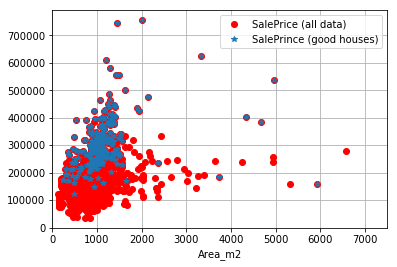

In [61]:
plt.plot(data['Area_m2'],data['SalePrice'],'ro')
plt.plot(good_houses['Area_m2'],good_houses['SalePrice'],'*')
plt.legend(['SalePrice (all data)','SalePrince (good houses)'])
plt.xlabel('Area_m2')
plt.grid(True)
plt.xlim([0,7500])

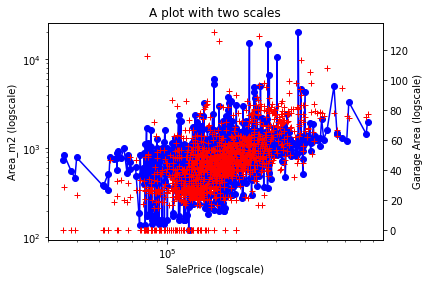

In [62]:
data.sort_values(['SalePrice'],ascending=True,inplace=True) #We order the data according to SalePrice

# Create axes
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.loglog(data['SalePrice'], data['Area_m2'], color='blue',marker='o')
ax.set_xlabel('SalePrice (logscale)')
ax.set_ylabel('Area_m2 (logscale)')
ax2.semilogx(data['SalePrice'],data[['GarageArea']].apply(lambda d: sfoot_to_smeter(d)), color='red',marker='+',linewidth=0)
ax2.set_ylabel('Garage Area (logscale)')

ax.set_title('A plot with two scales')

## Getting data out

Writing data out in pandas is as easy as getting data in. To save our DataFrame out to a new csv file, we can just do this:

In [63]:
data.to_csv("modified_data.csv")

There's also support for reading and writing [Excel files](http://pandas.pydata.org/pandas-docs/stable/io.html#excel-files), if you need it.

Also, creating a Numpy array is straightforward:

In [64]:
data_array = np.array(good_houses)

print(data_array.shape)

(229, 80)
